# Data frames

We're going to use a real [kaggle competition](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries) data set to explore Pandas dataframes. Grab the [rent.csv.zip](https://mlbook.explained.ai/data/rent.csv.zip) file and unzip it.

In [173]:
import pandas as pd
df = pd.read_csv("data/rent.csv", parse_dates=['created'])
df.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue


In [174]:
df.head(2).T

,0,1
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947
listing_id,7211212,7150865


## Sniff the data

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null datetime64[ns]
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 5.6+ MB


In [176]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [177]:
df.price.sort_values(ascending=False).head(10)

19558    4490000
9590     1150000
30689    1070000
29665    1070000
10581     135000
25538     111111
45674     100000
29082      90000
7336       85000
47995      80000
Name: price, dtype: int64

Can grab values and take average:

In [178]:
prices = df['price']
avg_rent = prices.mean()
print(f"Average rent is ${avg_rent:.0f}")

Average rent is $3830


In [179]:
bybaths = df.groupby(['bathrooms']).mean()
bybaths = bybaths.reset_index() # overcome quirk in Pandas
print(bybaths[['bathrooms','price']]) # print just num baths, avg price

    bathrooms         price
0         0.0   4001.530351
1         1.0   3233.940490
2         1.5   4257.066667
3         2.0   5501.066971
4         2.5   9028.920578
5         3.0  10391.060403
6         3.5  14534.785714
7         4.0  16239.213836
8         4.5  20868.000000
9         5.0  27214.700000
10        5.5  26300.000000
11        6.0  50250.000000
12        6.5  14500.000000
13        7.0  60000.000000
14       10.0   3600.000000


### Columns vs subsets

In [213]:
# get column
df.bedrooms.head(5)

0    3
1    2
2    1
3    1
4    4
Name: bedrooms, dtype: int64

In [208]:
df['price'].head(5) # this is a series (like a numpy array)

0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64

In [210]:
df[['price']].head(5) # this is a subset of dataframe and knows headers etc...

,price
0,3000
1,5465
2,2850
3,3275
4,3350


In [212]:
# get index 3 row
df.iloc[3] # same as df.iloc[3,:]

bathrooms                                                          1
bedrooms                                                           1
building_id                         28d9ad350afeaab8027513a3e52ac8d5
created                                          2016-04-18 02:22:02
description        Building Amenities - Garage - Garden - fitness...
display_address                                     East 49th Street
features                               ['Hardwood Floors', 'No Fee']
interest_level                                                     1
latitude                                                     40.7539
listing_id                                                   6888711
longitude                                                   -73.9677
manager_id                          1067e078446a7897d2da493d2f741316
photos             ['https://photos.renthop.com/2/6888711_6e660ce...
price                                                           3275
street_address                    

In [217]:
df.iloc[0:2] # first two rows

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],2,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",1,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue


In [219]:
df.iloc[0:2][['created','features']] # first two rows, show 2 columns

,created,features
0,2016-06-24 07:54:24,[]
1,2016-06-12 12:19:27,"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."


## Checking for missing values

In [180]:
df.isnull().any()

bathrooms          False
bedrooms           False
building_id        False
created            False
description         True
display_address     True
features           False
interest_level     False
latitude           False
listing_id         False
longitude          False
manager_id         False
photos             False
price              False
street_address      True
dtype: bool

In [181]:
df.isnull().head(5).T

,0,1,2,3,4
bathrooms,False,False,False,False,False
bedrooms,False,False,False,False,False
building_id,False,False,False,False,False
created,False,False,False,False,False
description,False,False,False,False,False
display_address,False,False,False,False,False
features,False,False,False,False,False
interest_level,False,False,False,False,False
latitude,False,False,False,False,False
listing_id,False,False,False,False,False


In [182]:
df.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

## Histogram variables

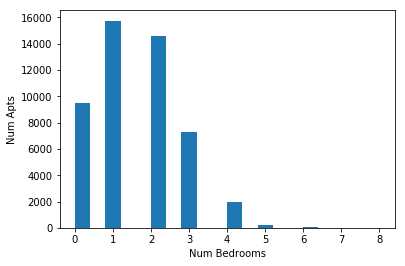

In [183]:
import matplotlib.pyplot as plt

plt.xlabel('Num Bedrooms')
plt.ylabel('Num Apts')
plt.hist(df.bedrooms, bins=20)
plt.show()

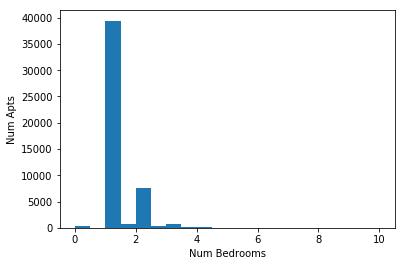

In [184]:
plt.xlabel('Num Bedrooms')
plt.ylabel('Num Apts')
plt.hist(df.bathrooms, bins=20)
plt.show()

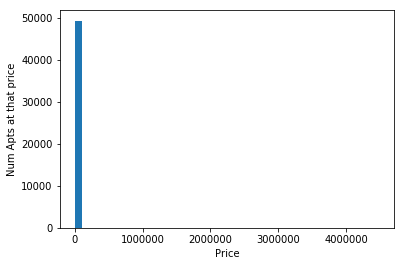

In [185]:
plt.xlabel('Price')
plt.ylabel('Num Apts at that price')
plt.hist(df.price, bins=45) # not useful since loooong right tail
plt.show()

### Inter-variable variation

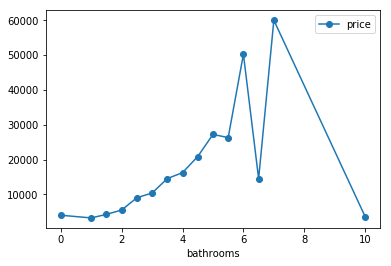

In [186]:
bybaths.plot.line('bathrooms','price', style='-o')
plt.show()

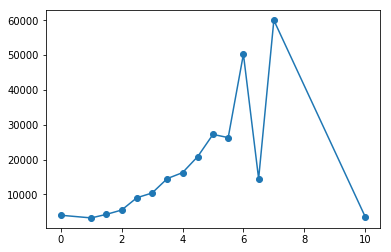

In [187]:
# OR, can do directly
plt.plot(bybaths.bathrooms, bybaths.price, marker='o') # note slightly different arguments
plt.show()

## Clean up

### Prices

In [188]:
df_clean = df[(df.price>1_000) & (df.price<10_000)]

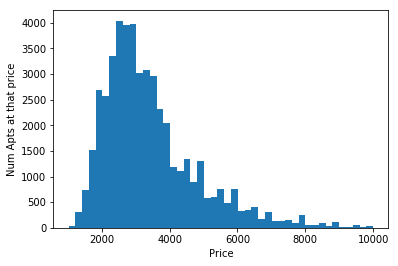

In [189]:
plt.xlabel('Price')
plt.ylabel('Num Apts at that price')
plt.hist(df_clean.price, bins=45) # not useful since loooong right tail
plt.show()

### Location

In [190]:
df_missing = df_clean[(df_clean.longitude==0) | (df_clean.latitude==0)]
len(df_missing)

11

In [191]:
# only 11 filter out
df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]

Using [GPS checker](https://gps-coordinates.org/new-york-city-latitude.php) gives a rough outline for New York City of latitude, longitude 40.55, -74.1 on the lower left and 40.94, -73.67 on the upper right. Let's filter others out.

In [192]:
df_clean = df_clean[(df_clean['latitude']>40.55) & (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) & (df_clean['longitude']<-73.67)]
print(len(df_clean), len(df))

48300 49352


## Let's train a model

Get numeric fields only:

In [193]:
df_train = df_clean[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]
df_train.head(5)

,bathrooms,bedrooms,longitude,latitude,price
0,1.5,3,-73.9425,40.7145,3000
1,1.0,2,-73.9667,40.7947,5465
2,1.0,1,-74.0018,40.7388,2850
3,1.0,1,-73.9677,40.7539,3275
4,1.0,4,-73.9493,40.8241,3350


In [194]:
X_train = df_train[['bedrooms','bathrooms','latitude','longitude']]
y_train = df_train['price']

In [195]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

rf.fit(X_train, y_train)
print(f"OOB R^2 score is {rf.oob_score_:.3f} (range is -infinity to 1.0; 1.0 is perfect)")

OOB R^2 score is 0.868 (range is -infinity to 1.0; 1.0 is perfect)


### What does model tell us about features?

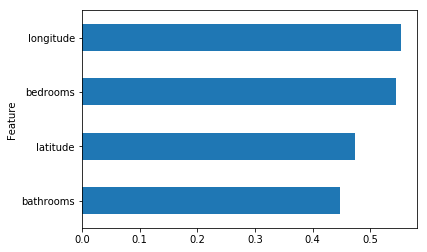

In [196]:
from rfpimp import *
I = oob_importances(rf, X_train, y_train)
I.plot(kind='barh', legend=False)
plt.show()

## Synthesize features

The data set has a `features` attribute (of type string) with a list of features about the apartment.

In [197]:
df.features.head(5)

0                                                   []
1    ['Doorman', 'Elevator', 'Fitness Center', 'Cat...
2    ['Laundry In Building', 'Dishwasher', 'Hardwoo...
3                        ['Hardwood Floors', 'No Fee']
4                                          ['Pre-War']
Name: features, dtype: object

Let's create three new boolean columns that indicate whether the apartment has a doorman, parking, or laundry.  Start by making a copy of the data frame because we'll be modifying it (otherwise we'll get error "A value is trying to be set on a copy of a slice from a DataFrame"):

In [198]:
df_aug = df[['bedrooms','bathrooms','latitude','longitude',
             'features','price']].copy()

Then we normalize the features column so that missing features values become blanks and we lowercase all of the strings.

In [199]:
# rewrite features column
df_aug['features'] = df_aug['features'].fillna('') # fill missing w/blanks
df_aug['features'] = df_aug['features'].str.lower() # normalize to lower case

Create the three boolean columns by checking for the presence or absence of a string in the features column. 

In [200]:
df_aug['doorman'] = df_aug['features'].str.contains("doorman")
df_aug['parking'] = df_aug['features'].str.contains("parking|garage")
df_aug['laundry'] = df_aug['features'].str.contains("laundry")
del df_aug['features'] # don't need this anymore
df_aug.head(3)

,bedrooms,bathrooms,latitude,longitude,price,doorman,parking,laundry
0,3,1.5,40.7145,-73.9425,3000,False,False,False
1,2,1.0,40.7947,-73.9667,5465,True,False,False
2,1,1.0,40.7388,-74.0018,2850,False,False,True


The other way to drop a column other than `del` is with `drop()` function:

In [224]:
df2 = df.drop('description',axis=1)
df2.head(2).T # kill this column, return new df without that column

,0,1
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,2,1
latitude,40.7145,40.7947
listing_id,7211212,7150865
longitude,-73.9425,-73.9667


Let's do some numerical feature stuff

In [201]:
df_aug["beds_to_baths"] = df_aug["bedrooms"]/(df_aug["bathrooms"]+1)
df_aug.head(3)

,bedrooms,bathrooms,latitude,longitude,price,doorman,parking,laundry,beds_to_baths
0,3,1.5,40.7145,-73.9425,3000,False,False,False,1.2
1,2,1.0,40.7947,-73.9667,5465,True,False,False,1.0
2,1,1.0,40.7388,-74.0018,2850,False,False,True,0.5


Beyond our scope here, but let's retrain model to see if it improves OOB score.

In [202]:
df_clean = df_aug[(df.price>1_000) & (df.price<10_000)]
df_train = df_clean[['bathrooms', 'bedrooms', 'longitude', 'latitude',
                   'doorman', 'parking', 'laundry', 'beds_to_baths', 'price']]
X_train = df_train[['bedrooms','bathrooms','latitude','longitude',
                    'doorman', 'parking', 'laundry', 'beds_to_baths']]
y_train = df_train['price']

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
print(f"OOB R^2 score is {rf.oob_score_:.3f} (range is -infinity to 1.0; 1.0 is perfect)")

OOB R^2 score is 0.870 (range is -infinity to 1.0; 1.0 is perfect)


That score is slightly better but not by much.

## Convert categorical to numeric data

In [203]:
df['interest_level'] = df['interest_level'].map({'low':1,'medium':2,'high':3})

In [205]:
df[['interest_level']].head(5)

,interest_level
0,2
1,1
2,3
3,1
4,1
